# Filters and Pooling layers

- In this notebook I have hand coded a few filters and passed them throught the entire image
- The resultant features are highlighted in the plotting
- Feel free to experiment with filter of your choice

### Loading the image

- Here we are using the image from `scipy.datasets`
- The image is displayed below

In [10]:
import numpy as np
from scipy.datasets import ascent

ascent_image=np.array(ascent())

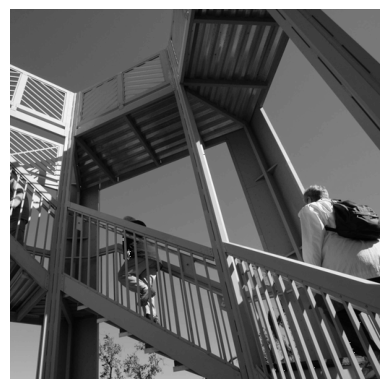

In [11]:
import matplotlib.pyplot as plt

plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(ascent_image)
plt.show()

### Noting the dimentions of the data

- This will be useful for implementing the filter and pooling algorithms

In [12]:
image_transformed=np.zeros_like(ascent_image)

size_x=image_transformed.shape[0]
size_y=image_transformed.shape[1]

### Defining some basic filters

- The code below works for filters of size `(3,3)`
- The chosen filters here are;
    - Random
    - To detect Horizontal lines
    - To detect Vertical lines

In [13]:
filter1=np.array([
    [0,1,0],
    [1,-4,1],
    [0,1,0]
])

filter2=np.array([
    [-1,-2,-1],
    [0,0,0],
    [1,2,1]
])

filter3=np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
])

weight=1

In [14]:
filter=filter2

### Vectorized implementation of the Filter algorithm

- The explanation of the steps is mentioned in the comments section

In [18]:
for i in range(1,size_x-1):
    for j in range(1,size_y-1):
        '''
        res+=ascent_image[i-1,j-1]*filter[0,0]
        res+=ascent_image[i-1,j]*filter[0,1]
        res+=ascent_image[i-1,j+1]*filter[0,2]

        res+=ascent_image[i,j-1]*filter[1,0]
        res+=ascent_image[i,j]*filter[1,1]
        res+=ascent_image[i,j+1]*filter[1,2]

        res+=ascent_image[i+1,j-1]*filter[2,0]
        res+=ascent_image[i+1,j]*filter[2,1]
        res+=ascent_image[i+1,j+1]*filter[2,2]
        '''
        res=np.sum(ascent_image[i-1:i+2,j-1:j+2]*filter)
        res*=weight

        if(res>255):
            res=255
        if(res<0):
            res=0
        
        image_transformed[i,j]=res

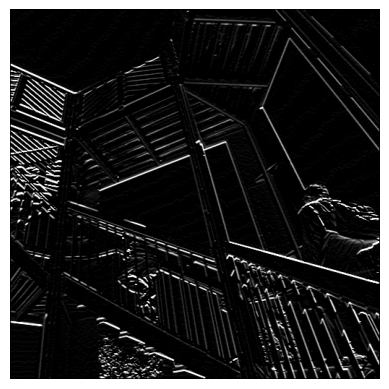

In [19]:
plt.grid(False)
plt.axis('off')
plt.gray()
plt.imshow(image_transformed)

### Vectorized implementation of the Pooling algorithm

- The explanation of the steps is mentioned in the comments section
- Here the image is pooled with window size `(2,2)`

In [26]:
new_x=int(size_x/2)
new_y=int(size_y/2)

pooled_image=np.zeros((new_x,new_y))

for i in range(0,size_x,2):
    for j in range(0,size_y,2):
        '''
        res=[]
        res.append(image_transformed[i,j])
        res.append(image_transformed[i,j+1])
        res.append(image_transformed[i+1,j])
        res.append(image_transformed[i+1,j+1])

        pooled_image[int(i/2),int(j/2)]=max(res)
        '''
        pooled_image[int(i/2),int(j/2)]=np.max(image_transformed[i:i+2,j:j+2])

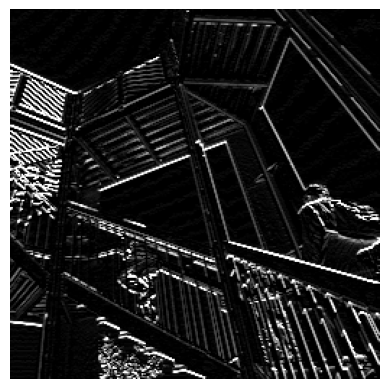

In [27]:
plt.grid(False)
plt.axis('off')
plt.gray()
plt.imshow(pooled_image)

### Significance of Filters and Pooling

- The pooled images highlights the features filtered by the filtering layer
- Hence Convolutional and Pooling layers are often used in pairs

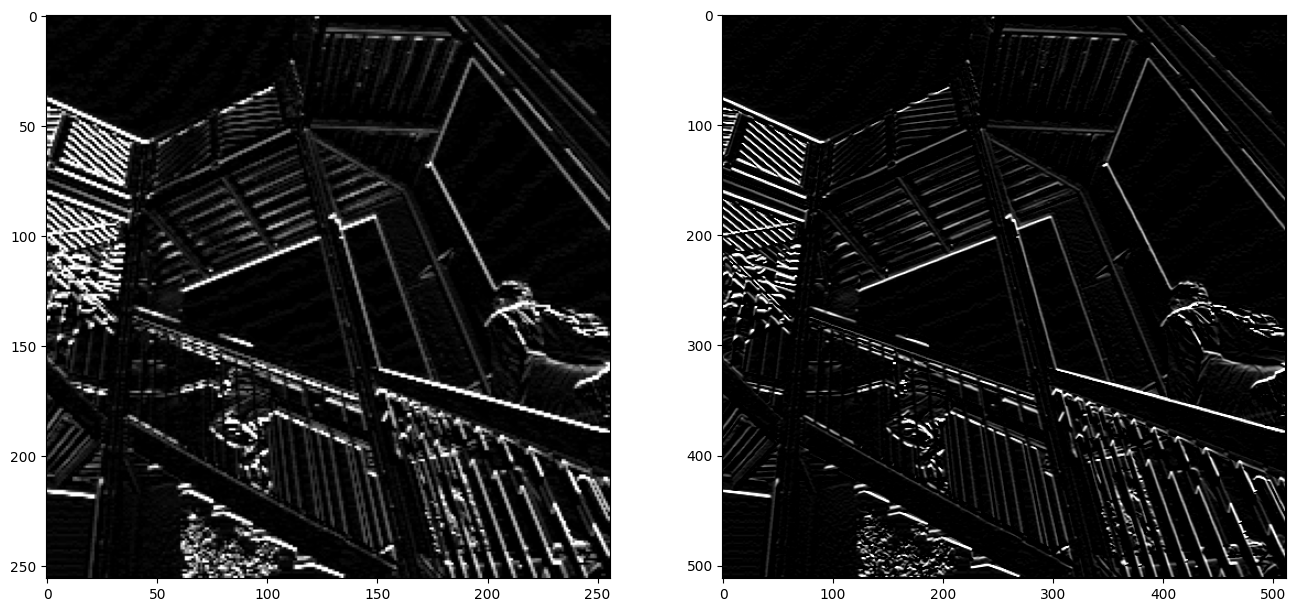

In [28]:
fig,ax=plt.subplots(1,2,figsize=(16,16))

plt.gray()
ax[0].imshow(pooled_image)
ax[1].imshow(image_transformed)